# Análise Exploratória de Dados

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import warnings
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from random import sample
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [33]:
# Lendo os dados e trantando os mesmo
data = pd.read_csv('./../use-of-force.csv')
data.loc[data.Sector == '-', 'Sector'] = np.nan
# Substituindo valores nulos por 'Não identificado' das colunas Precinct e Sector
# Para uma compreenção melhor 
data['Precinct'] = data['Precinct'].fillna('Não identificado')
data['Sector'] = data['Sector'].fillna('Não identificado')

data.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,Não identificado,Não identificado,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,Não identificado,Não identificado,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,Não identificado,Não identificado,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,Não identificado,Não identificado,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,Não identificado,Não identificado,NaN,4745,16299,White,Female


### 1) Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o beat com maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

In [1]:
# Criar os graficos
def criatGrafic(mat_table, list_colus, type_d, x0):
    y_list = []
    trace_list = []
    for i in range(0, len(list_colus)):
        y_list.append(list(mat_table.loc[list_colus[i]].values))
    
    for j in range(0,len(list_colus)):
        sorteados = sample(range(0, 255), 10)
        color = str('rgb('+str(sorteados[0])+', '+str(sorteados[1])+', '+str(sorteados[2])+')')
        trace_list.append(go.Bar(x = x0, y = y_list[j], name = type_d+' '+str(list_colus[j]),
                marker=dict(color=color) ) )
    return trace_list

In [34]:
# Delegacias
precinct = np.array(data['Precinct'].unique())
precinct

array(['Não identificado', 'E', 'W', 'S', 'N', 'X', 'SW'], dtype=object)

### No gráfico abaixo é possível analisar a quantidade de incidentes por delegacia e também o tipo do incidente. Como pode se observar a delegacia que possui mais incidentes é a West, também é possível notar que a quantidade de incidentes de nível 2 é bem menor que os incidentes nível 1. 

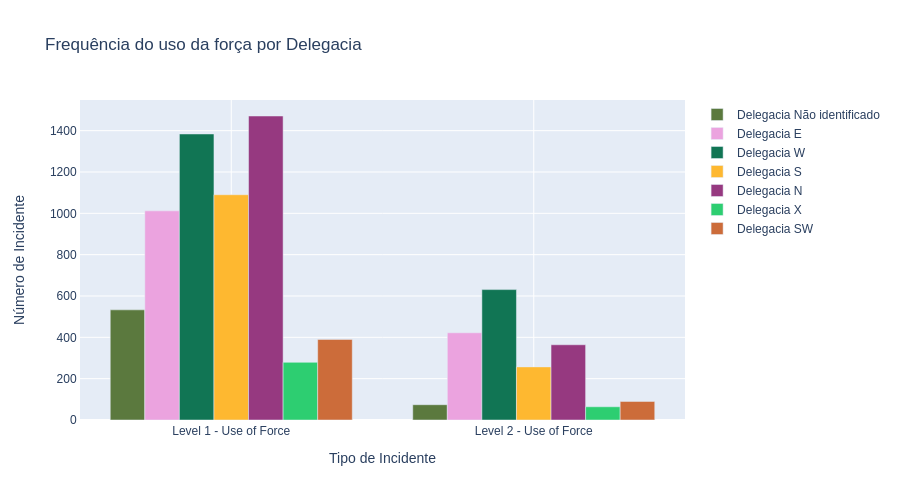

In [35]:
type_calo_dele = 'Delegacia'
# Selecionando apenas os valores do  campo Incident_Num
x0_dele = ['Level 1 - Use of Force', 'Level 2 - Use of Force']
precinct_mat_dele = data.pivot_table(index = 'Precinct', columns = 'Incident_Type',
                            values = 'Incident_Num', aggfunc='count')
# Criando o grafico
lis_gra = criatGrafic(precinct_mat_dele, precinct, type_calo_dele, x0_dele)

layout = go.Layout(yaxis_title="Número de Incidente", xaxis_title="Tipo de Incidente",
                   barmode='group', title= "Frequência do uso da força por Delegacia")

fig = go.Figure(data=lis_gra, layout=layout)
fig.show(renderer="png",  width=900, height=500)

In [36]:
# Grafico dinamico no Jupyter notebook
iplot(fig)

In [8]:
# Setores
sector = np.array(data['Sector'].unique())
sector

array(['Não identificado', 'E', 'C', 'K', 'M', 'S', 'Q', 'O', 'B', 'N',
       'D', 'G', 'R', 'U', 'X', 'W', 'J', 'F', 'L', '99'], dtype=object)

### No gráfico abaixo é possível analisar a quantidade de incidentes por setor e também o tipo do incidente. Como pode se observar a setor que possui mais incidentes é E, assim como no gráfico anterior também é possível notar que a quantidade de incidentes de nível 2 é bem menor que os incidentes nível 1.

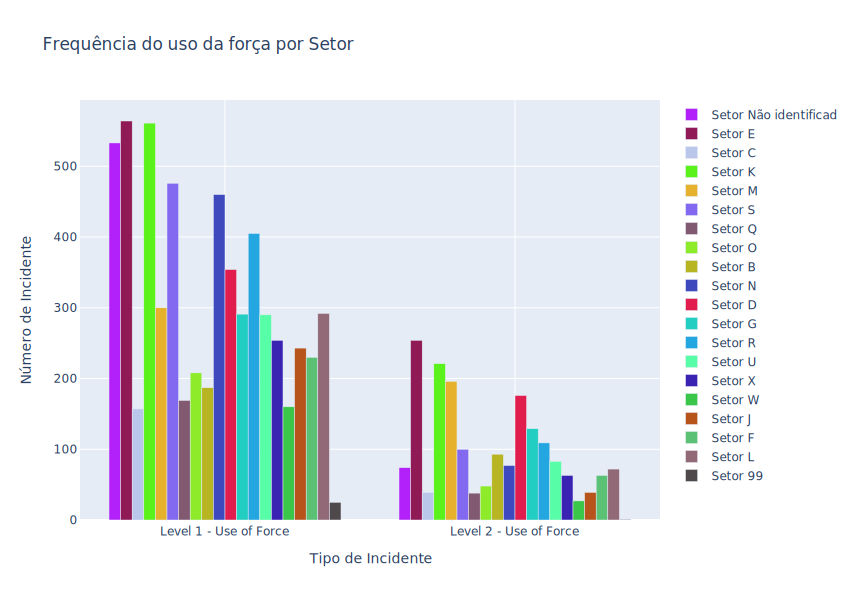

In [11]:
type_calo = 'Setor'
x0 = ['Level 1 - Use of Force', 'Level 2 - Use of Force']
# Selecionando apenas os valores do  campo Incident_Num
precinct_mat = data.pivot_table(index = 'Sector', columns = 'Incident_Type', 
                            values = 'Incident_Num', aggfunc='count')
# Criando o grafico
lis_gra = criatGrafic(precinct_mat, sector, type_calo, x0)

layout = go.Layout(yaxis_title="Número de Incidente", xaxis_title="Tipo de Incidente",
                   barmode='group', title= "Frequência do uso da força por Setor")
fig = go.Figure(data=lis_gra, layout=layout)
#iplot(fig)
fig.show(renderer="svg",  width=850, height=600)

In [12]:
# Grafico dinamico no Jupyter notebook
iplot(fig)

## Em cada setor, qual o beat com maior número de incidentes?

In [10]:

beat = data.groupby(['Precinct', 'Sector', 'Beat']).count()
beat= beat[['Incident_Num']]
beat.reset_index(inplace=True)


# Pegando o beat com maior número de incidentes por setor.  
beat_max = beat.groupby('Sector').max()
beat_max.reset_index(inplace=True)
beat_max.sort_values(by='Incident_Num', ascending=False, inplace=True)
beat_max = beat_max.set_index(['Precinct', 'Sector', 'Beat'])

### No gráfico abaixo é possível notar o beat por setor com o maior número de incidentes é o E3, com o setor E e a delegacia E.

Text(0.5, 1.0, 'Beat com maior número de incidentes por Setor')

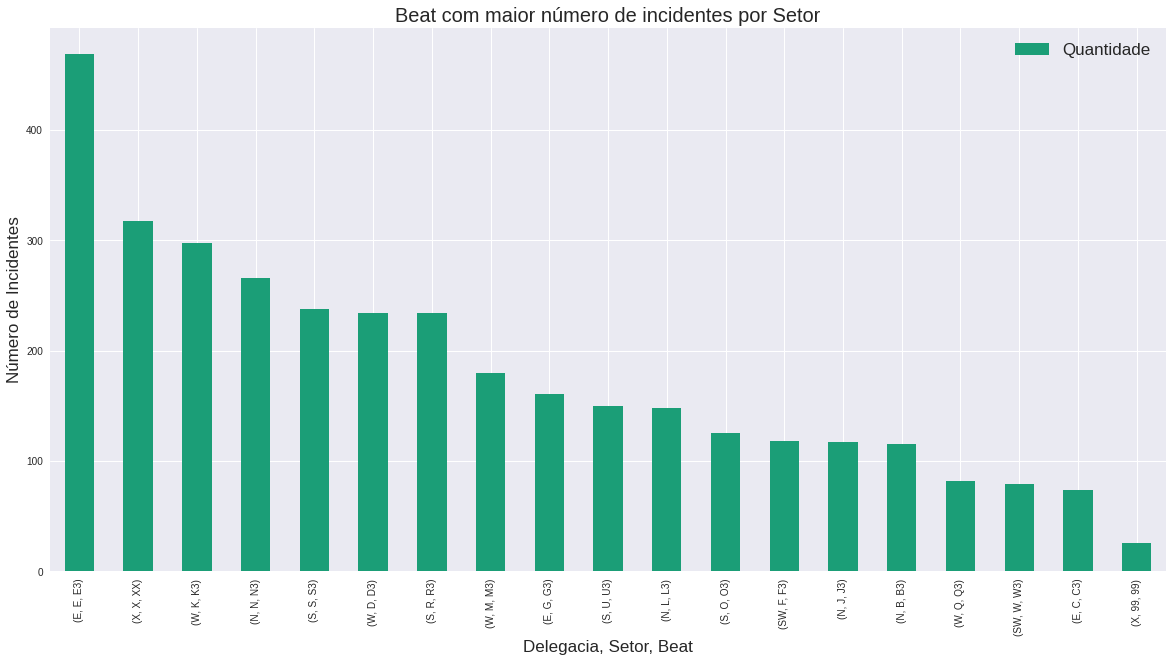

In [11]:
plt.style.use('seaborn')
beat_max.plot.bar( figsize=(20, 10), colormap='Dark2')
plt.ylabel('Número de Incidentes',  fontsize=17)
plt.xlabel('Delegacia, Setor, Beat',  fontsize=17)
plt.legend(['Quantidade'], fontsize=17)
plt.title('Beat com maior número de incidentes por Setor', fontsize = 20)

## Apresente também o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

In [12]:
data = pd.read_csv('./../use-of-force.csv')
incident = data.groupby(['Precinct', 'Sector', 'Incident_Type'])['Incident_Num'].count()

# Pegando apenas os incidentes de nivel 2
per_incidente = incident.groupby(level=1).apply(lambda x: x * 100/ x.sum()).reset_index()
level_2 = per_incidente['Incident_Type'] == 'Level 2 - Use of Force'
per_incidente = per_incidente[level_2]

per_incidente.sort_values(by='Incident_Num', ascending= False, inplace=True)
per_incidente.set_index(['Precinct', 'Sector'], inplace=True)

In [13]:
# O percentual de incidentes nivel 2 por setor e delegacia
per_incidente

Incident_Type  Incident_Num
Precinct Sector                                      
W        M       Level 2 - Use of Force     39.516129
N        B       Level 2 - Use of Force     33.214286
W        D       Level 2 - Use of Force     33.207547
E        E       Level 2 - Use of Force     31.051345
         G       Level 2 - Use of Force     30.714286
W        K       Level 2 - Use of Force     28.260870
N        U       Level 2 - Use of Force     22.252011
SW       F       Level 2 - Use of Force     21.501706
S        R       Level 2 - Use of Force     21.206226
E        C       Level 2 - Use of Force     19.897959
X        X       Level 2 - Use of Force     19.873817
N        L       Level 2 - Use of Force     19.780220
S        O       Level 2 - Use of Force     18.750000
W        Q       Level 2 - Use of Force     18.357488
S        S       Level 2 - Use of Force     17.361111
SW       W       Level 2 - Use of Force     14.438503
N        N       Level 2 - Use of Force     14.338920
         J       Level 2 - Use of Force     13.829787
X        99      Level 2 - Use of Force      3.846154

### No gráfico abaixo é apresentado o percentual de incidentes de Nível 2 por delegacia e setor, pode-se notar que a delegacia W com o setor M possui o maior percentual de incidentes com 39.51%.

Text(0.5, 1.0, 'Porcentagem de Incidentes level 2 por Setor')

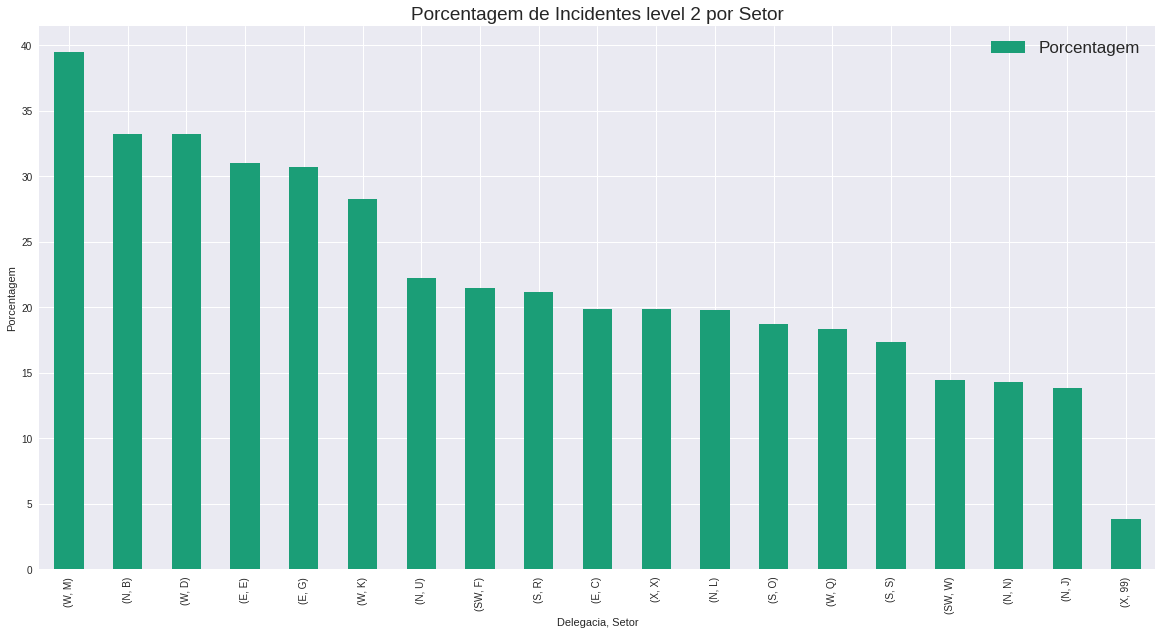

In [14]:
plt.style.use('seaborn')
per_incidente.plot.bar( figsize=(20, 10), colormap='Dark2')
plt.ylabel('Porcentagem')
plt.xlabel('Delegacia, Setor')
plt.legend(['Porcentagem'], fontsize=17)
plt.title('Porcentagem de Incidentes level 2 por Setor', fontsize=19)

### Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro dos dias, dos meses, das semanas ou dos anos?

In [4]:
data = pd.read_csv('./../use-of-force.csv')
# Pegando a data no formato de ano-mês-semana-dia
time_day['time_day'] = pd.to_datetime(time_day['Occured_date_time']).dt.to_period('D')

# Pegando o numero de incidentes por dia
time_day = time_day.groupby(['time_day']).count()
time_day = time_day[['Incident_Num']]
time_day

,Incident_Num
time_day,
2014-01-27,1
2014-02-25,1
2014-03-13,6
2014-03-20,2
2014-04-01,1
...,...
2018-08-06,2
2018-08-07,1
2018-08-08,1


### No gráfico abaixo é possível analisar os picos de incidentes por dia, com isso é possível observar que ao longo do tempo o número de incidentes está caindo.

Text(0.5, 1.0, 'Incidentes por Dia')

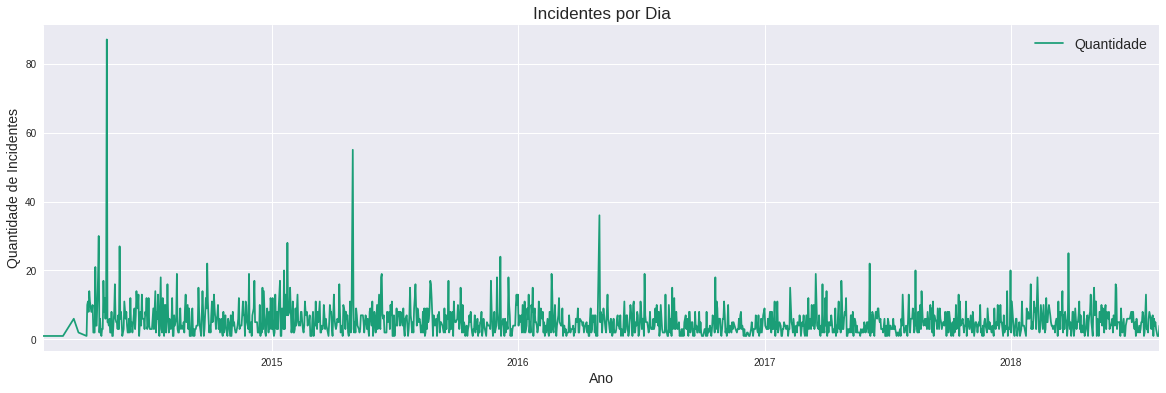

In [19]:
plt.style.use('seaborn')
time_day[['Incident_Num']].plot(figsize=(20, 6), colormap='Dark2')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Incidentes', fontsize=14)
plt.legend(['Quantidade'], fontsize=14)
plt.title('Incidentes por Dia', fontsize=17)

In [13]:
time_week = pd.read_csv('./../use-of-force.csv')
# Pegando as datas por semana
time_week['time_week'] = pd.to_datetime(time_week['Occured_date_time']).dt.to_period('W')

# Pegando o numero de incidentes por semana
time_week = time_week.groupby(['time_week']).count()
time_week = time_week[['Incident_Num']]
time_week

,Incident_Num
time_week,
2014-01-27/2014-02-02,1
2014-02-24/2014-03-02,1
2014-03-10/2014-03-16,6
2014-03-17/2014-03-23,2
2014-03-31/2014-04-06,55
...,...
2018-07-09/2018-07-15,24
2018-07-16/2018-07-22,34
2018-07-23/2018-07-29,35


### No gráfico abaixo é possível analisar os picos de incidentes por semana, com isso é possível observar que os anos de 2014 e 2015 tiram muitos picos de incidentes por semana.

Text(0.5, 1.0, 'Incidentes por Semana')

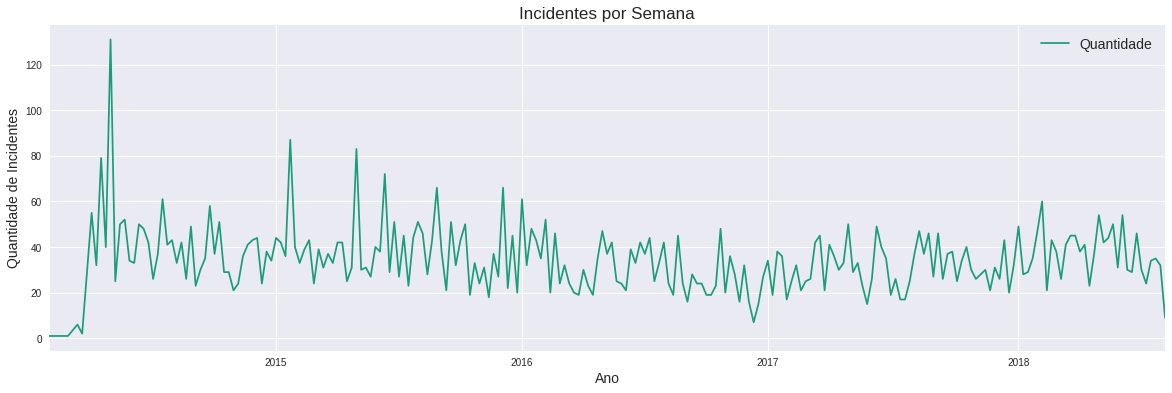

In [20]:
plt.style.use('seaborn')
time_week[['Incident_Num']].plot(figsize=(20, 6), colormap='Dark2')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Incidentes', fontsize=14)
plt.legend(['Quantidade'], fontsize=14)
plt.title('Incidentes por Semana', fontsize=17)

In [20]:
time_month = pd.read_csv('./../use-of-force.csv')
# Pegando as datas por mês
time_month['time_month'] = pd.to_datetime(time_month['Occured_date_time']).dt.to_period('M')

# Pegando a quantidade de incidentes por mês
time_month = time_month.groupby(['time_month']).count()
time_month = time_month[['Incident_Num']]
time_month.head(10)

,Incident_Num
time_month,
2014-01,1
2014-02,1
2014-03,8
2014-04,236
2014-05,260
2014-06,178
2014-07,193
2014-08,162
2014-09,154


### No gráfico abaixo é possível analisar os picos de incidentes por mês, com isso é possível observar que os picos de incidentes ocorrem com maior frequência  no início de cada ano 

Text(0.5, 1.0, 'Incidentes por Mês')

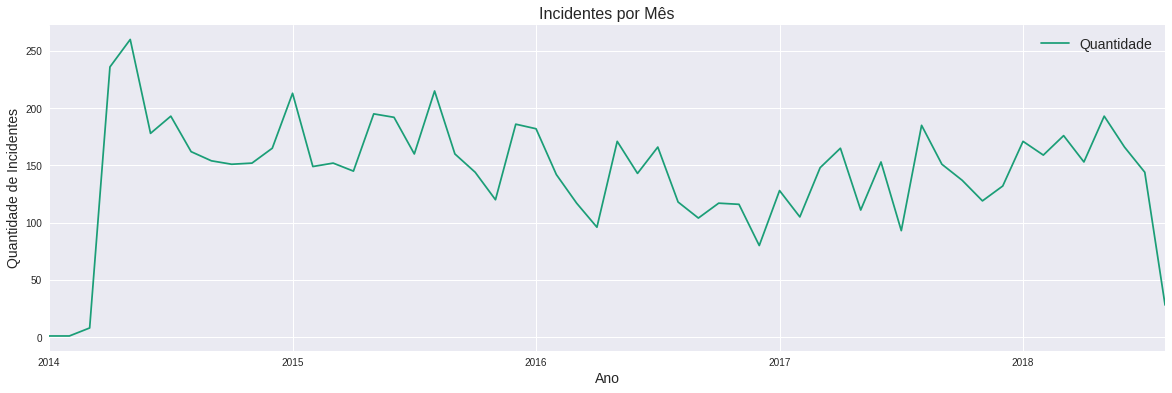

In [21]:
plt.style.use('seaborn')
time_month[['Incident_Num']].plot(figsize=(20, 6), colormap='Dark2')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Incidentes', fontsize=14)
plt.legend(['Quantidade'], fontsize=14)
plt.title('Incidentes por Mês', fontsize=16)

In [25]:
 
time_year = pd.read_csv('./../use-of-force.csv')
# Pegando as datas por ano
time_year['time_year'] = pd.to_datetime(time_year['Occured_date_time']).dt.to_period('Y')

# Pegando o quantidade de inciades por ano
time_year = time_year.groupby(['time_year']).count()
time_year = time_year[['Incident_Num']]
time_year

,Incident_Num
time_year,
2014,1661
2015,2031
2016,1552
2017,1627
2018,1190


### No gráfico abaixo é possível analisar os picos de incidentes por ano, com isso é possível observar que o ano que teve mais incidentes foi o ano de 2015 e que a cada ano o número de incidentes está caindo. 

Text(0.5, 1.0, 'Incidentes por Ano')

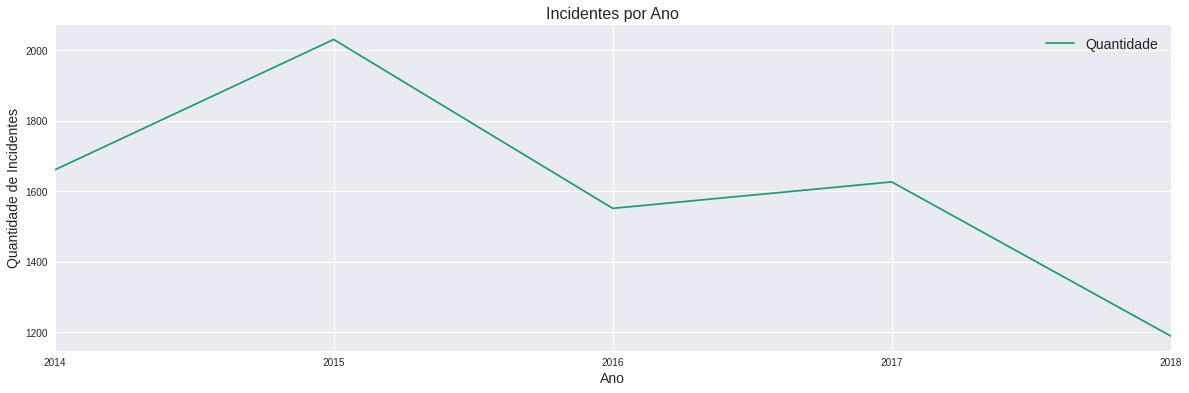

In [26]:
plt.style.use('seaborn')
time_year[['Incident_Num']].plot(figsize=(20, 6), colormap='Dark2')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Incidentes', fontsize=14)
plt.legend(['Quantidade'], fontsize=14)
plt.title('Incidentes por Ano', fontsize=16)

### 3. A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente violentos. No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz de elencar os policiais em ordem decrescente de chance de violência excessiva com base no número de incidentes dos quais eles participaram.

In [17]:
data = pd.read_csv('./../use-of-force.csv')
# Pegando o numero de incidentes por policial
incidentes = data.groupby(['Officer_ID'])['Incident_Num'].count()
incidentes = incidentes.reset_index()
# Calculandado o o percetual de incidentes por policial 
incidentes['percentage'] = incidentes['Incident_Num'] * 100/incidentes['Incident_Num'].sum()
incidentes.sort_values(by='percentage', ascending=False, inplace=True)
#Pegando os 20 Policiais que tem mais incidentes 
incidentes_top20 = incidentes.head(20)
incidentes_top20.index = incidentes_top20['Officer_ID']


In [19]:
# Top 20 dos policiais que tem mais incidentes 
incidentes_top20

,Officer_ID,Incident_Num,percentage
Officer_ID,,,
456,456,80,0.992433
1697,1697,45,0.558243
1559,1559,44,0.545838
1775,1775,41,0.508622
1750,1750,41,0.508622
1807,1807,41,0.508622
612,612,41,0.508622
1735,1735,37,0.459000
1562,1562,37,0.459000


### No gráfico abaixo é possível analisar os 20 policiais que mais tem incidentes, vale notar que o policial 456, possui o maior número de incidentes com  um percentual de 99.24% 

Text(0.5, 1.0, 'Incidentes por policial')

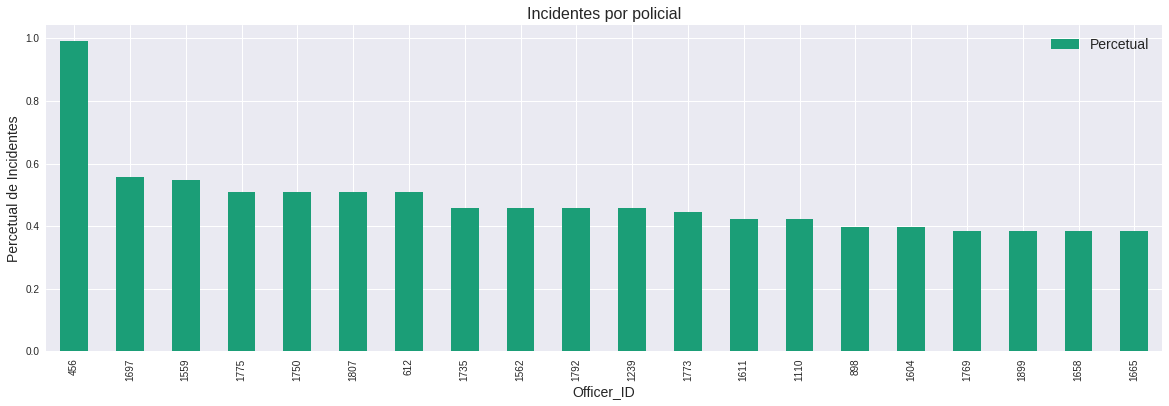

In [18]:
plt.style.use('seaborn')
incidentes_top20['percentage'].plot.bar(figsize=(20, 6), colormap='Dark2')
plt.xlabel('Officer_ID', fontsize=14)
plt.ylabel('Percetual de Incidentes', fontsize=14)
plt.legend(['Percetual'], fontsize=14)
plt.title('Incidentes por policial', fontsize=16)

### Criando um gráfico para analisar o percentual de incidentes por policial e o tipo de Incidente

In [22]:
data = pd.read_csv('./../use-of-force.csv')
# Criando uma tabela com o numero de incidentes por policial e o tipo de incidentes
mat_perce = data.pivot_table(index = 'Officer_ID', columns = 'Incident_Type', 
                            values = 'Incident_Num', aggfunc='count')
# Calculando o percetual de incidentes por policial e polo o tipo de incidente 
mat_perce['percentage percentage level 1'] = mat_perce['Level 1 - Use of Force'] * 100/mat_perce['Level 1 - Use of Force'].sum()
mat_perce['percentage percentage level 2'] = mat_perce['Level 2 - Use of Force'] * 100/mat_perce['Level 2 - Use of Force'].sum()
mat_perce

Incident_Type,Level 1 - Use of Force,Level 2 - Use of Force,percentage percentage level 1,percentage percentage level 2
Officer_ID,,,,
7,1.0,NaN,0.016236,NaN
18,1.0,NaN,0.016236,NaN
40,1.0,NaN,0.016236,NaN
70,3.0,NaN,0.048709,NaN
72,NaN,1.0,NaN,0.052576
...,...,...,...,...
4835,2.0,NaN,0.032473,NaN
4854,2.0,NaN,0.032473,NaN
4860,1.0,NaN,0.016236,NaN


In [37]:
data = pd.read_csv('./../use-of-force.csv')

incidentes = data.groupby(['Officer_ID'])['Incident_Num'].count()
incidentes = incidentes.reset_index()

incidentes['percentage'] = incidentes['Incident_Num'] * 100/incidentes['Incident_Num'].sum()
incidentes.sort_values(by='percentage', ascending=False, inplace=True)
# Pegando o id dos 10 policiais que tem mais incidentes 
policiais_10_id = np.array(incidentes['Officer_ID'].head(10))
policiais_10_index = np.array(incidentes['Officer_ID'].head(10).index)


In [38]:
# Criando o grafico com o percetual de incidentes por policial e o tipo de incidentes 
y_list = []
trace_list = []
for i in range(0, len(policiais_10_index)):
    y = []
    y.append(mat_perce.loc[policiais_10_id[i]].values[2])
    y.append(mat_perce.loc[policiais_10_id[i]].values[3])
    y_list.append(y)
    
for j in range(0,len(policiais_10_index)):
        sorteados = sample(range(0, 255), 10)
        color = str('rgb('+str(sorteados[0])+', '+str(sorteados[1])+', '+str(sorteados[2])+')')
        trace_list.append(go.Bar(x = x0, y = y_list[j], name = 'Officer_ID'+' '+str(policiais_10_id[j]),
                marker=dict(color=color) ) )

### Assim como no gráfico anterior é possível notar que o policial 456 é o que tem o percentual maior, mas vale notar que os policiais 1697 e 1562 possui uma tendência maior de incidentes de nível 2, ambos os policiais tem um percentual de incidentes nível 2 bem maior que incidentes de nível 1.

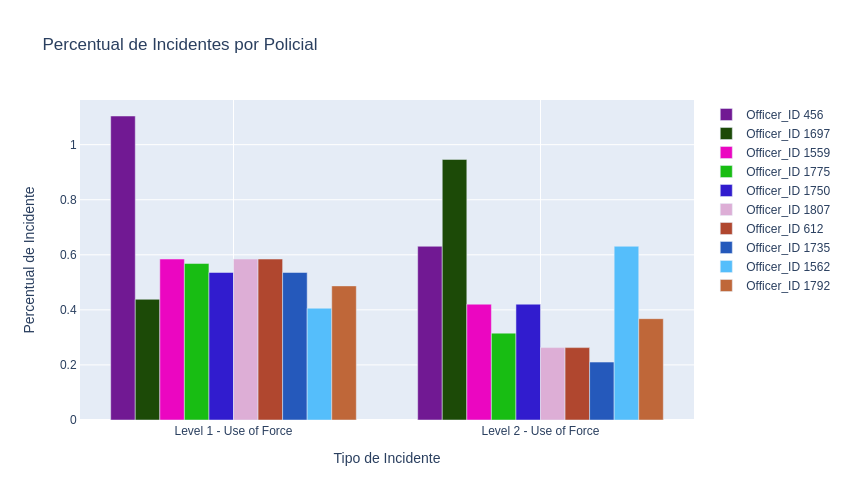

In [39]:
layout = go.Layout(yaxis_title="Percentual de Incidente", xaxis_title="Tipo de Incidente",
                   barmode='group', title= "Percentual de Incidentes por Policial")
fig = go.Figure(data=trace_list, layout=layout)
#iplot(fig)
fig.show(renderer="png",  width=850, height=500)

In [40]:
# Grafico dinamico no Jupyter notebook
iplot(fig)